In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import randn

%matplotlib inline

1. Numerical Data Plotting

  relplot(),
  scatterplot(),
  lineplot()

2. Categorical Data Ploting

  catplot(),
  boxplot(),
  stripplot(),
  swarmplot(),
  etc…

3. Visualizing Distribution of the Data

  distplot(),
  kdeplot(),
  jointplot(),
  rugplot()

4. Linear Regression and Relationship

  regplot(),
  lmplot()

5. Controlling Plotted Figure Aesthetics

  figure styling,
  axes styling,
  color palettes

In [2]:
sns.set_style(style =  "whitegrid")

# Numerical Data Plotting

## Relational Plot (Scatter Plot)

**Tips Dataset**

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
tips.describe(include="category")

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [6]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

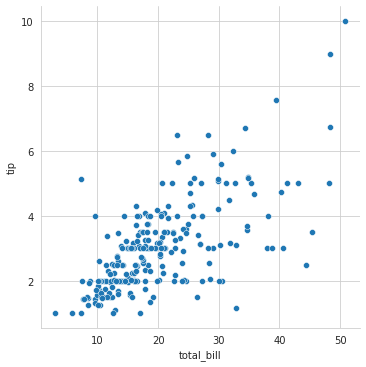

In [7]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips)

In [8]:
# Get directory of facet grid
#dir(sns.FacetGrid)

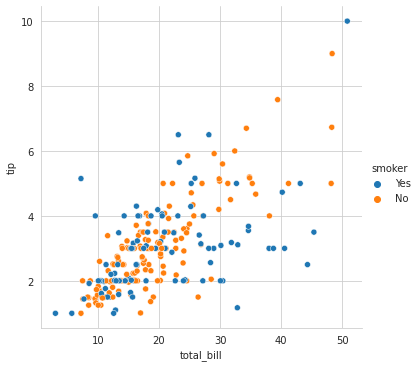

In [9]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker')

In [10]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [11]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [12]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [13]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

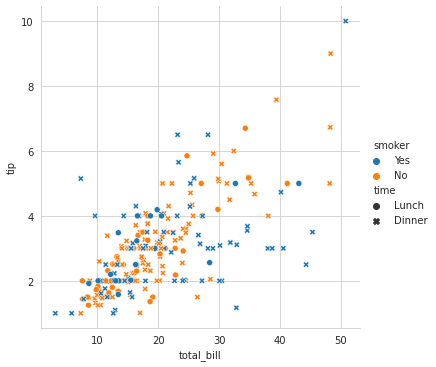

In [14]:
# Complex Graph
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', style = "time")

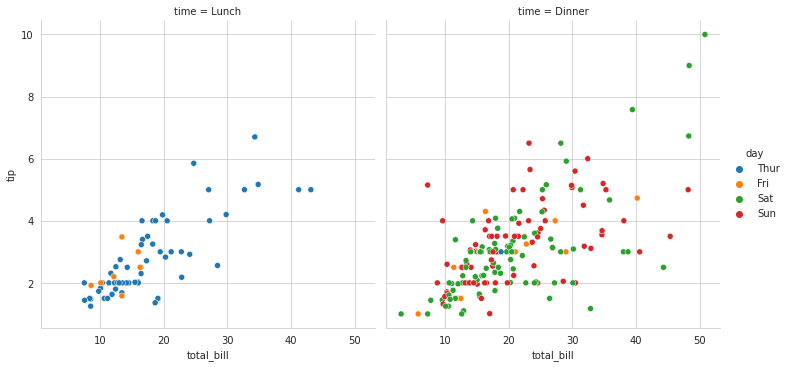

In [15]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'day', col = 'time')

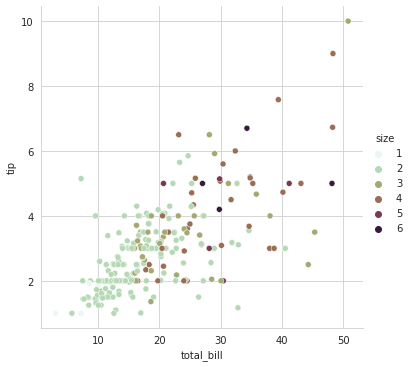

In [16]:
# Changing color of points
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'size', palette = 'ch: r=0.8, l=0.95')

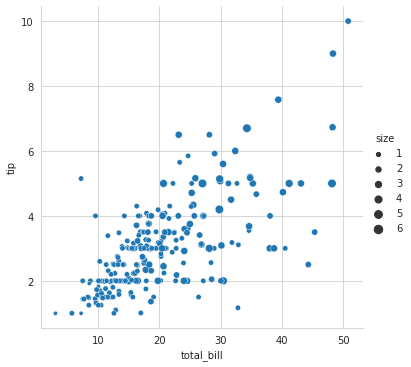

In [17]:
# Adjusting size of circles
sns.relplot(x = 'total_bill', y = 'tip', data = tips, size = 'size')

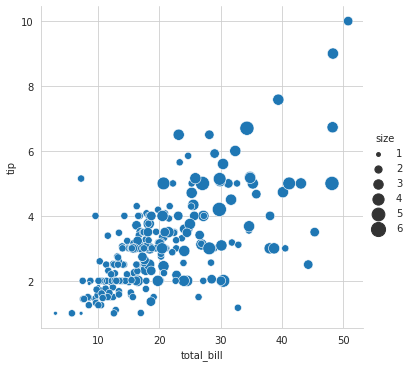

In [18]:
# Adjusting size of circles
# Normalizing size of data points b/w 15 to 200
sns.relplot(x = 'total_bill', y = 'tip', data = tips, size = 'size', sizes = (15, 200))

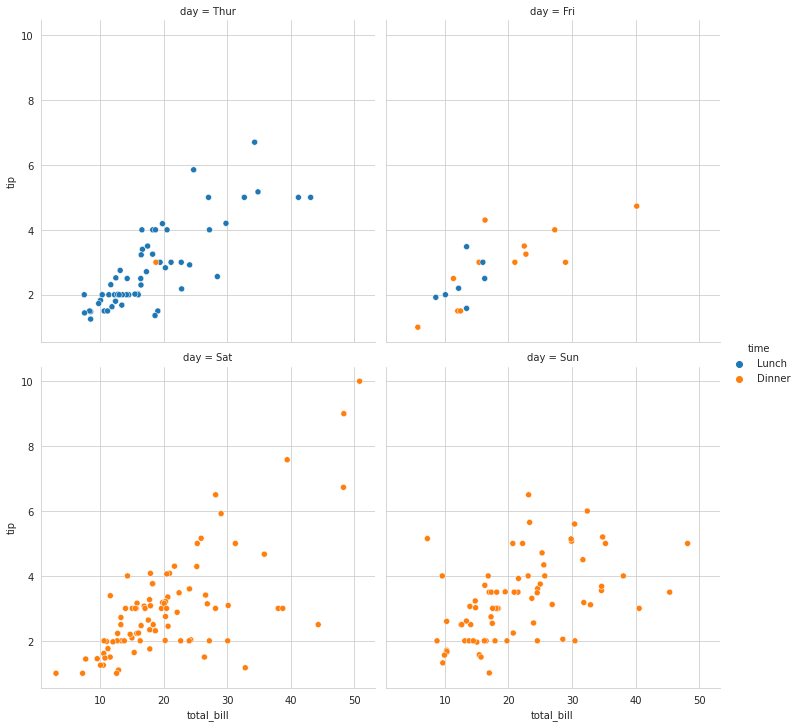

In [19]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="time", col="day", col_wrap=2)

## Relational Plot (Line Plot)

**Time - Value Dataset in Pandas**

In [20]:
# np.arange(start = 20, stop = 200, step = 15)
# randn(10)

# cumsum = cumulative sum
df = pd.DataFrame(dict(time = np.arange(500), value = randn(500).cumsum()))
df.head()

,time,value
0,0,2.461985
1,1,3.966521
2,2,3.571101
3,3,3.869300
4,4,4.746751


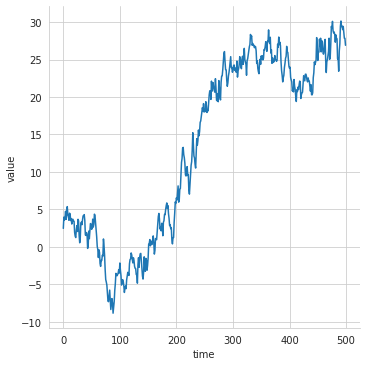

In [21]:
# kind attr is by default scatter plot

sns.relplot(kind = 'line', data = df, x = 'time', y = 'value')

In [22]:
# Create unsorted data frame
df_unsorted = pd.DataFrame(randn(500, 2).cumsum(axis = 0), columns = ['time', 'value'])
df_unsorted.head()

,time,value
0,-0.872079,-1.506115
1,-0.244803,-2.795362
2,-0.276178,-2.149942
3,-1.876359,-1.989429
4,-1.599021,-1.604813


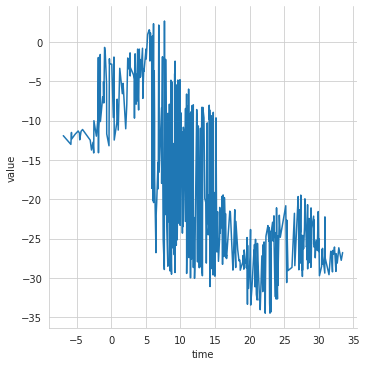

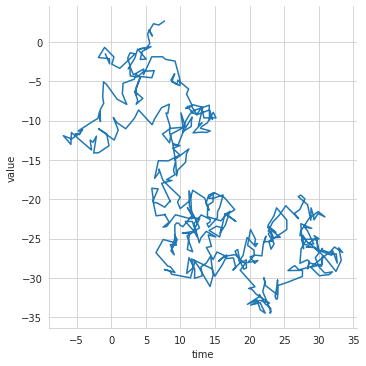

In [23]:
# For sorting data
sns.relplot(kind = 'line', data = df_unsorted, x = 'time', y = 'value', sort = True)
sns.relplot(kind = 'line', data = df_unsorted, x = 'time', y = 'value', sort = False)

**FMRI Dataset**

In [24]:
# Plotting noisy dataset

fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [25]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [26]:
fmri.describe(include ="object")

,subject,event,region
count,1064,1064,1064
unique,14,2,2
top,s5,cue,parietal
freq,76,532,532


In [27]:
fmri.dtypes

subject       object
timepoint      int64
event         object
region        object
signal       float64
dtype: object

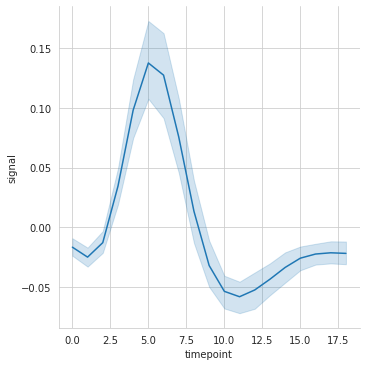

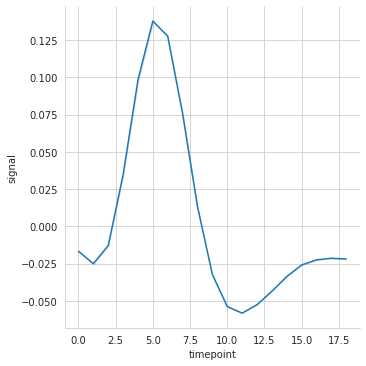

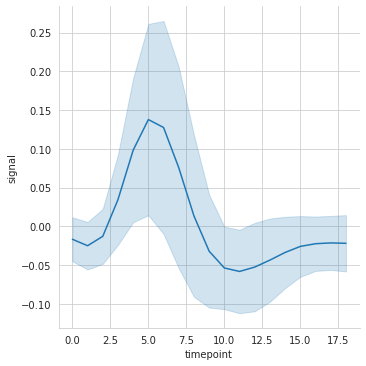

In [28]:
sns.relplot(x = 'timepoint', y = 'signal', data = fmri, kind = 'line')
sns.relplot(x = 'timepoint', y = 'signal', data = fmri, kind = 'line', ci = False) # ci = confidence interval
sns.relplot(x = 'timepoint', y = 'signal', data = fmri, kind = 'line', ci = 'sd')

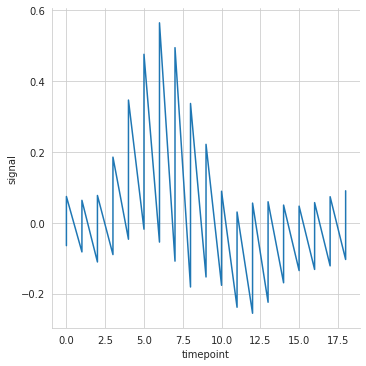

In [29]:
# Plotting data without any estimator, i.e Plotting real points of data
sns.relplot(x = 'timepoint', y = 'signal', data = fmri, kind = 'line', estimator = None)

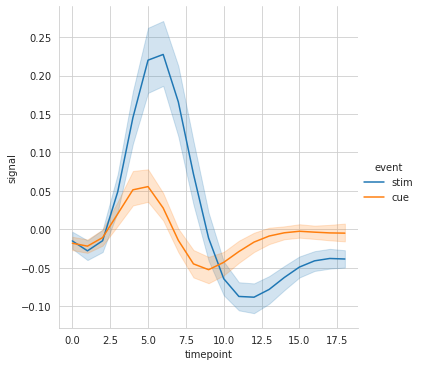

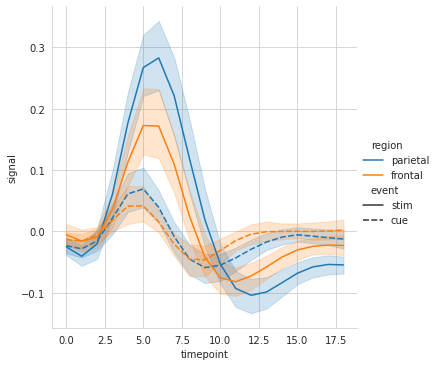

In [30]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', kind = 'line', data = fmri)
# sns.lineplot(x = 'timepoint', y = 'signal', hue = 'event', data = fmri)

sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event' , kind = 'line', data = fmri)

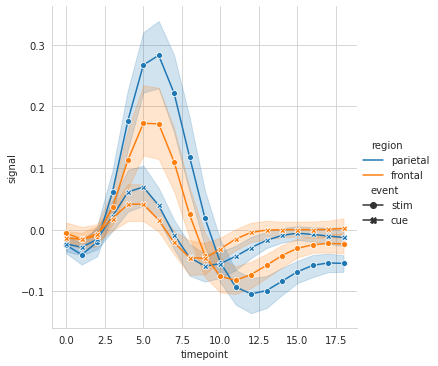

In [31]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event' , kind = 'line', data = fmri, markers = True, dashes = False)

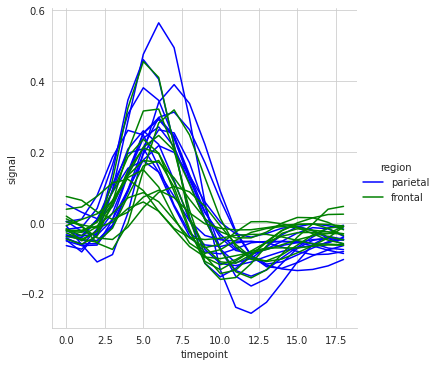

In [32]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', units = 'subject', estimator = None , kind = 'line', data = fmri.query("event == 'stim'"), palette=['b', 'g'])

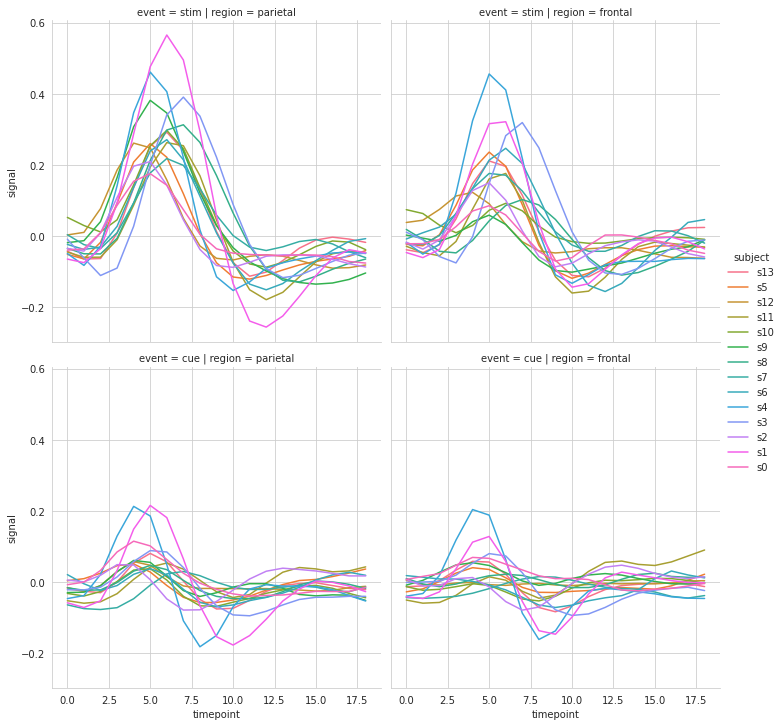

In [33]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'subject', col = 'region', row = 'event', height = 5, estimator = None , kind = 'line', data = fmri)

**Dots Dataset**

In [34]:
dots = sns.load_dataset('dots').query("align == 'dots'")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


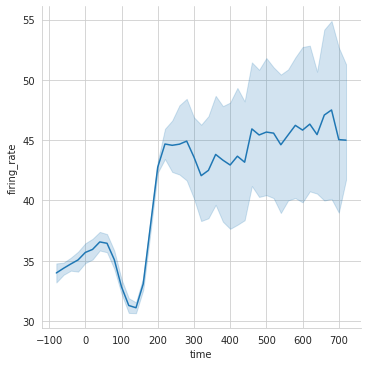

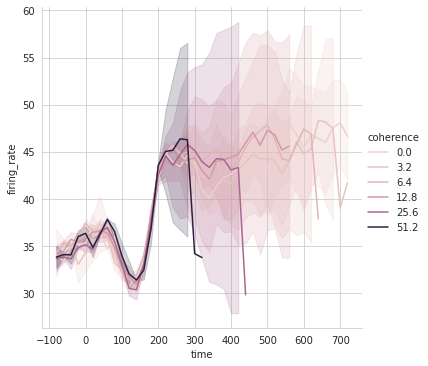

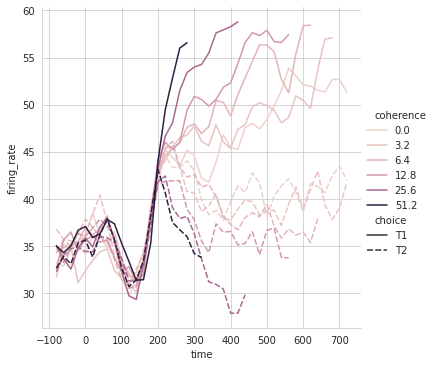

In [35]:
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line')
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence')
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence', style = 'choice')

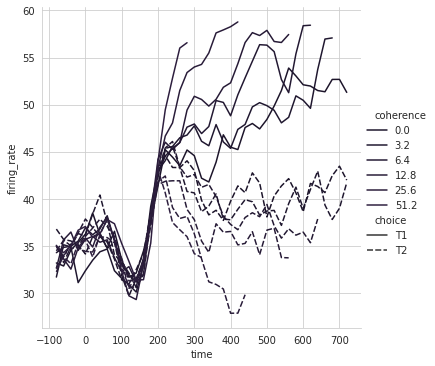

In [36]:
# Setting up Color Palette for Plots
Palette = sns.cubehelix_palette(light=0.1, n_colors=6)
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence', style = 'choice', palette = Palette)

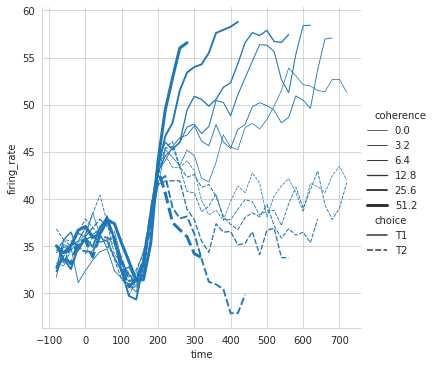

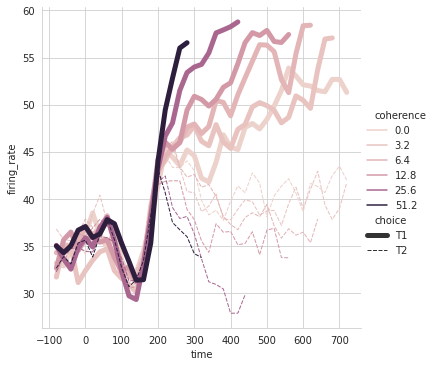

In [37]:
# Changing widht of lines based on their intensity

# Changes line width with the coherence value
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', size = 'coherence', style = 'choice')

# Customizing line width
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence', size = 'choice', style = 'choice', sizes = (1,5))

**Plot Date & time**

In [38]:
# data = pd.DataFrame({'time': pd.date_range('2019-06-02', periods=500), 'value' : randn(500).cumsum()})

data = pd.DataFrame(dict(time = pd.date_range('2019-06-02', periods=500), value = randn(500).cumsum()))
data.head()

,time,value
0,2019-06-02,1.412523
1,2019-06-03,2.905699
2,2019-06-04,3.673997
3,2019-06-05,3.115669
4,2019-06-06,2.026540


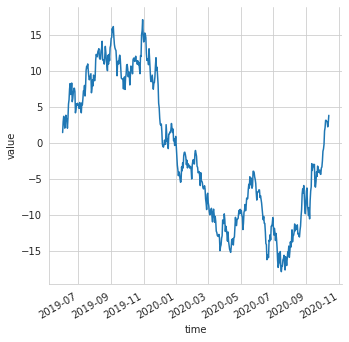

In [39]:
# Messy because dates overlap at x-axis
g = sns.relplot(x ='time', y = 'value', kind = 'line', data = data)

# Turns messy dates into nicely formatted dates
g.fig.autofmt_xdate()

## Line Plot

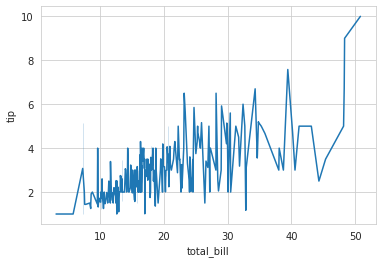

In [40]:
sns.lineplot(x = 'total_bill', y = 'tip', data = tips)

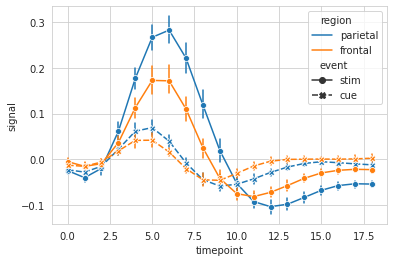

In [41]:
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event', data = fmri, markers = True, err_style = 'bars', ci = 68)

## Scatter Plot

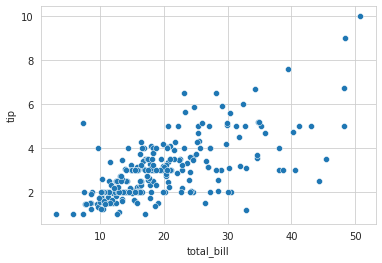

In [42]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)
# sns.relplot(x = 'total_bill', y = 'tip', data = tips)

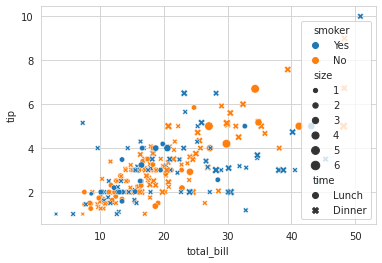

In [43]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', size = 'size', style = 'time')

**Iris Dataset**

In [44]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


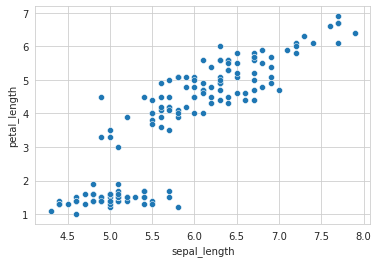

In [45]:
sns.scatterplot(x = 'sepal_length', y = 'petal_length', data = iris)

# Categorical Data Plotting

## CatPlot

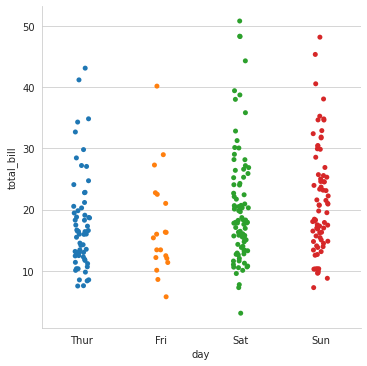

In [47]:
# Scatter plot for categorical data

sns.catplot(x = 'day', y = 'total_bill', data = tips)

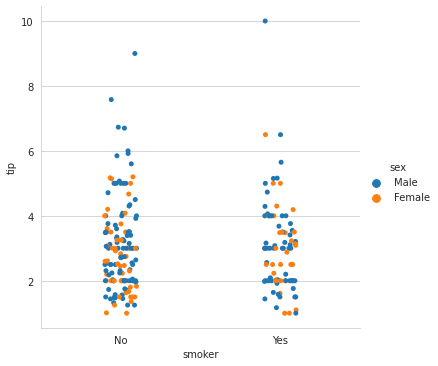

In [48]:
sns.catplot(x = 'smoker', y = 'tip', data = tips, order = ['No', 'Yes'], hue = 'sex')

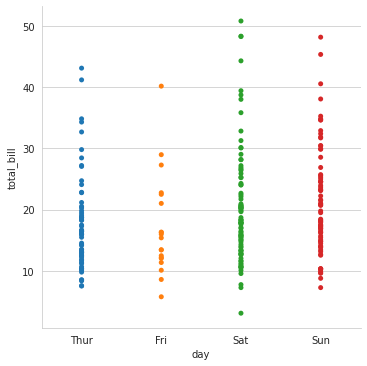

In [49]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, jitter = False)

## SwarmPlot

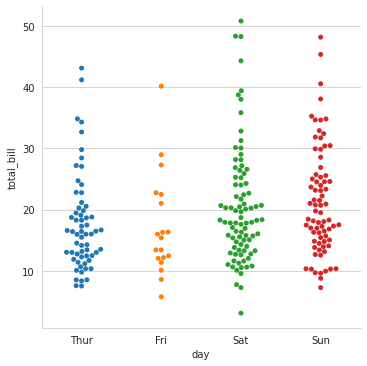

In [50]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'swarm')

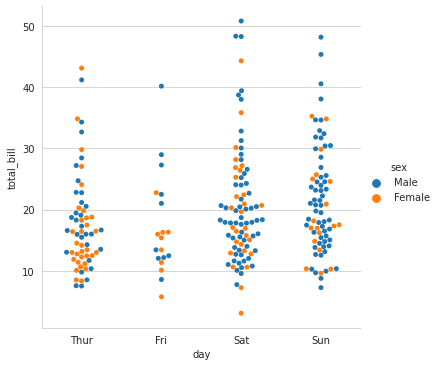

In [51]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'swarm', hue = 'sex')

## Box Plot

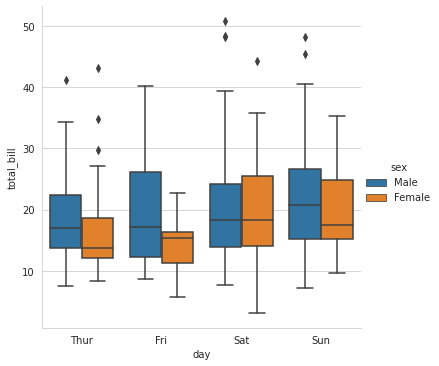

In [52]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'box', data = tips, hue = 'sex')

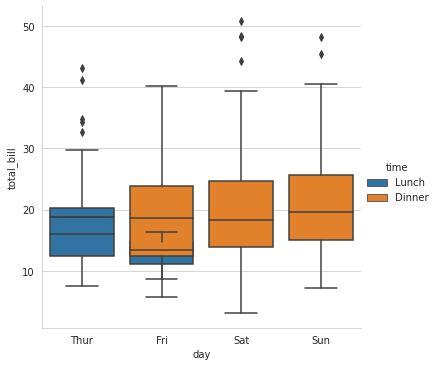

In [53]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'box', data = tips, hue = 'time', dodge = False)

## Boxen Plot

Diamonds Dataset

In [55]:
diamond = sns.load_dataset('diamonds')
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


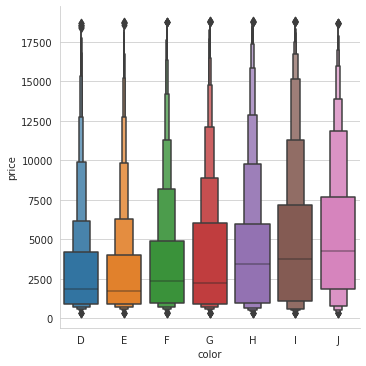

In [56]:
sns.catplot(x = 'color', y = 'price', kind = 'boxen', data = diamond.sort_values('color'))

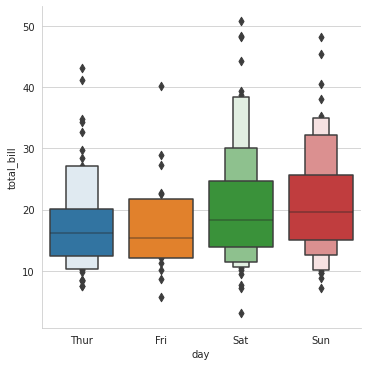

In [57]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'boxen', data = tips, dodge = False)

## Violin Plot

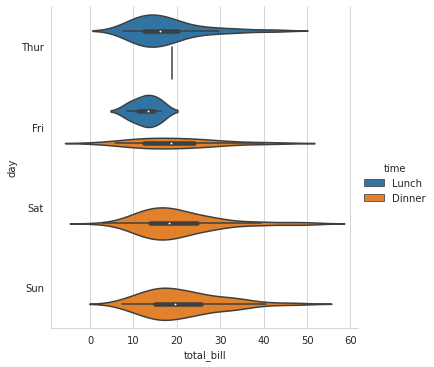

In [58]:
sns.catplot(x = 'total_bill', y = 'day', hue = 'time', kind = 'violin', data = tips)

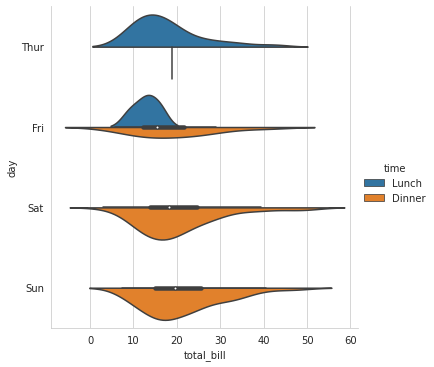

In [59]:
sns.catplot(x = 'total_bill', y = 'day', hue = 'time', kind = 'violin', data = tips, split = True)

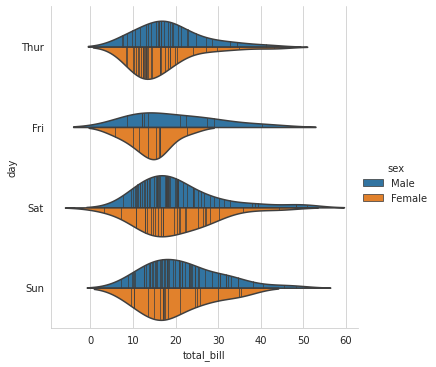

In [61]:
sns.catplot(x = 'total_bill', y = 'day', hue = 'sex', kind = 'violin', data = tips, split = True, inner = 'stick')

## Swarm Plot & Violin Plot together

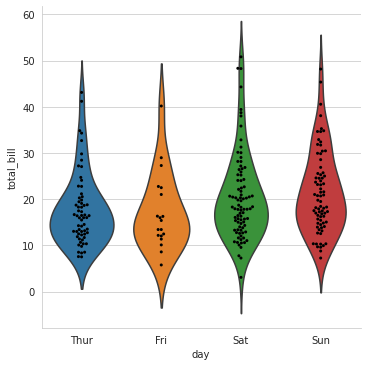

In [64]:
g = sns.catplot(x = 'day', y = 'total_bill', kind = 'violin', data = tips, inner = None)
sns.swarmplot(x = 'day', y = 'total_bill', color = 'k', size = 3, data = tips, ax = g.ax)

## Bar Plot with Cat Plot

**Titanic Dataset**

In [65]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


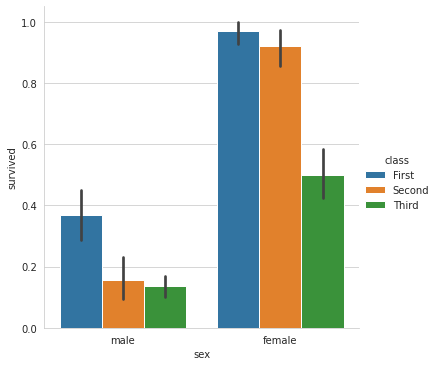

In [66]:
sns.catplot(x = 'sex', y = 'survived', hue = 'class', kind = 'bar', data = titanic)

## Count Plot

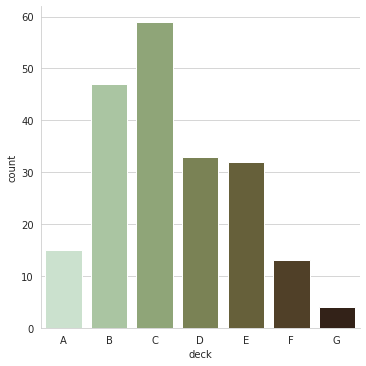

In [67]:
# Single color bar with changed gradient
sns.catplot(x = 'deck', kind = 'count', palette = 'ch:0.95', data = titanic)

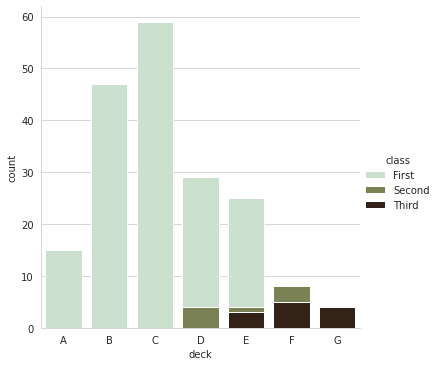

In [68]:
sns.catplot(x = 'deck', kind = 'count', palette = 'ch:0.95', data = titanic, hue = 'class', dodge = False)

## Point Plot

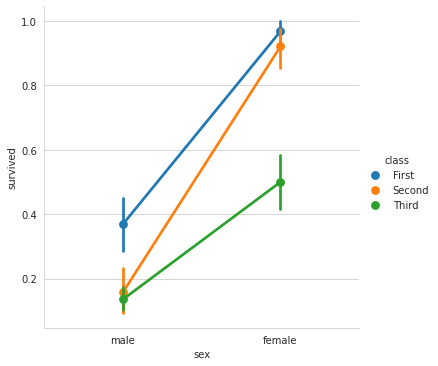

In [69]:
sns.catplot(x = 'sex', y = 'survived', hue = 'class', kind = 'point', data = titanic)

# Visualizing Distribution of the Data

## Normal Distribution

In [70]:
x = randn(100)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


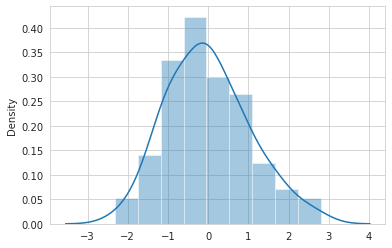

In [84]:
sns.distplot(x)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


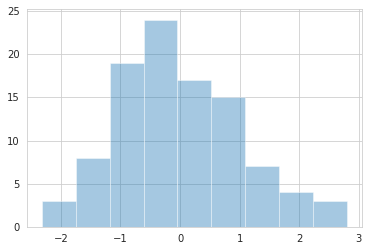

In [73]:
# Removing kernel density
sns.distplot(x, kde = False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


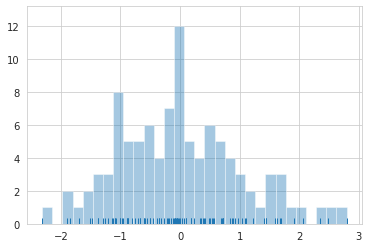

In [74]:
sns.distplot(x, kde = False, rug = True, bins = 30)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


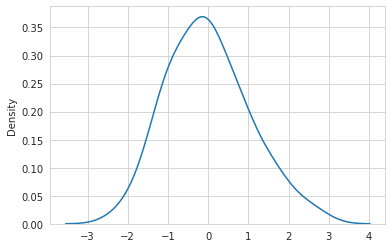

In [76]:
sns.distplot(x, kde = True, hist = False, rug = False, bins = 30)

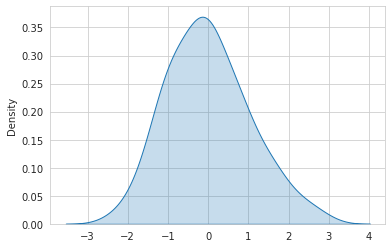

In [77]:
sns.kdeplot(x, shade = True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


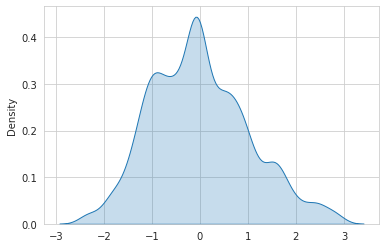

In [79]:
# Bw = bandwidth
sns.kdeplot(x, shade = True, bw = 0.2)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


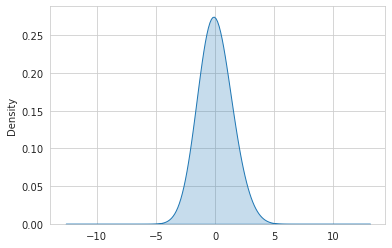

In [83]:
sns.kdeplot(x, shade = True, bw = 1, cut = 10)

## Bivariate Distribution

## Joint Plot

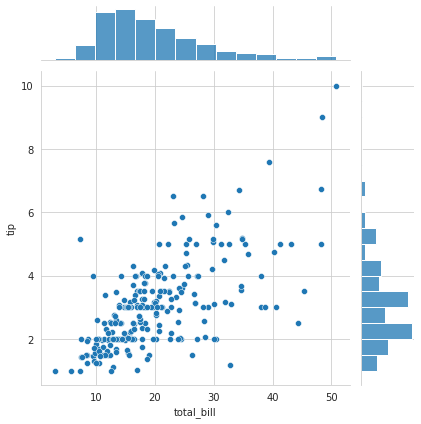

In [85]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips)

## Hex Plot

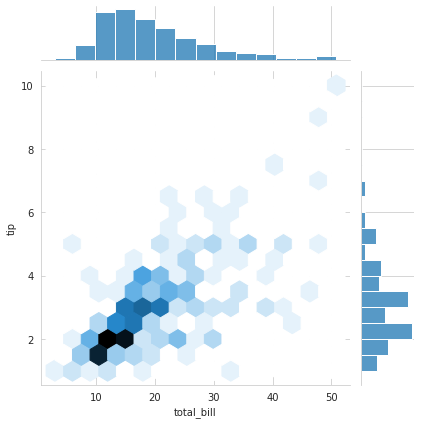

In [86]:
sns.jointplot(x = 'total_bill', y = 'tip', kind = 'hex', data = tips)

## KDE Plot

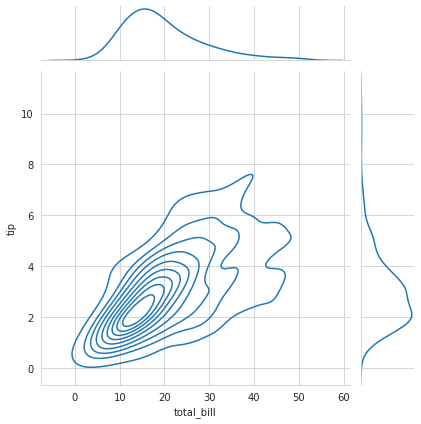

In [87]:
sns.jointplot(x = 'total_bill', y = 'tip', kind = 'kde', data = tips)

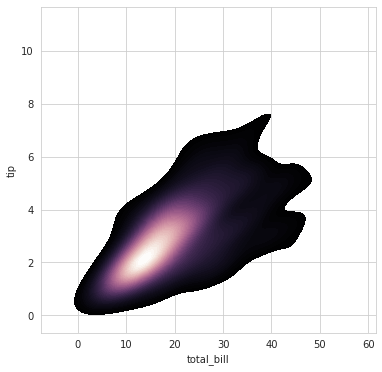

In [91]:
f, ax = plt.subplots(figsize = (6, 6))
cmap = sns.cubehelix_palette(as_cmap = True, dark = 0, light = 1, reverse = True)
sns.kdeplot(x = 'total_bill', y = 'tip', data = tips, cmap = cmap, n_levels = 60, shade = True)

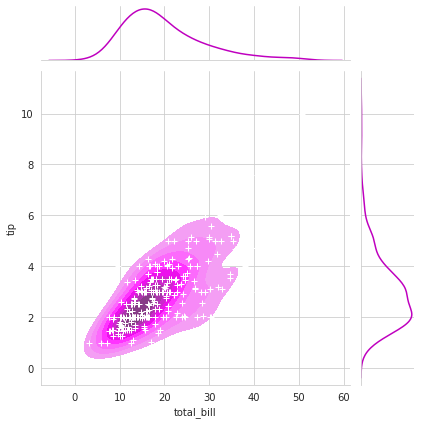

In [93]:
g = sns.jointplot(x = 'total_bill', y = 'tip', kind = 'kde', data = tips, color = 'm', shade = True)
g.plot_joint(plt.scatter, c = 'w', s = 30, linewidth = 1, marker = '+')
g.ax_joint.collections[0].set_alpha(0)

## Pair Plot

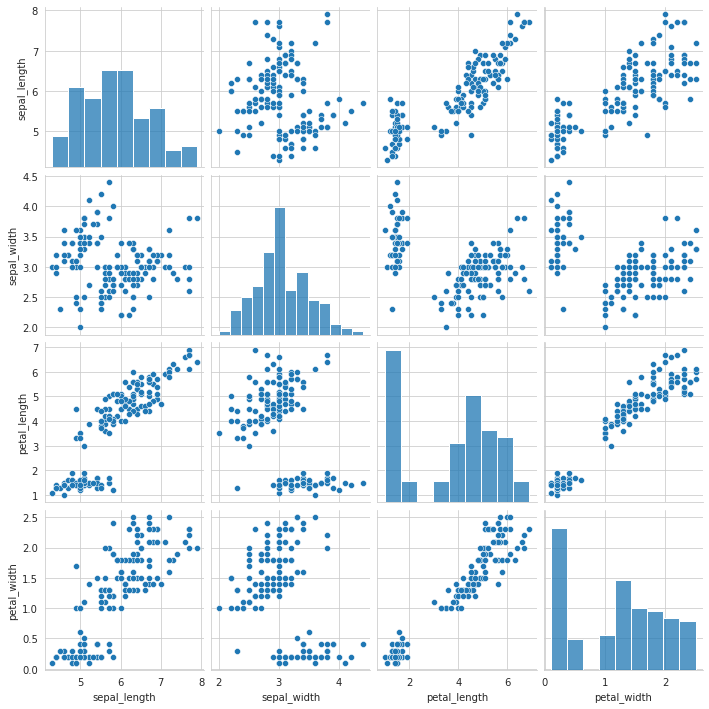

In [95]:
sns.pairplot(iris)

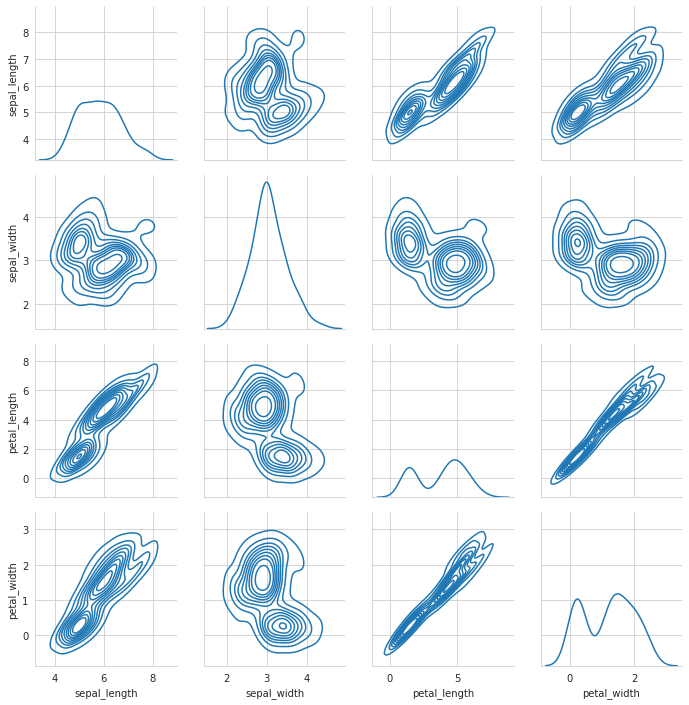

In [97]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 10)

# Linear Regression & Relationship

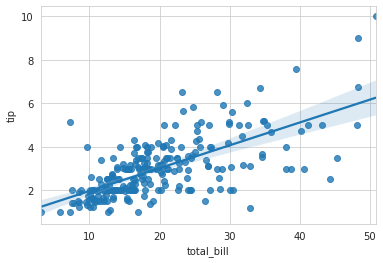

In [98]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips)

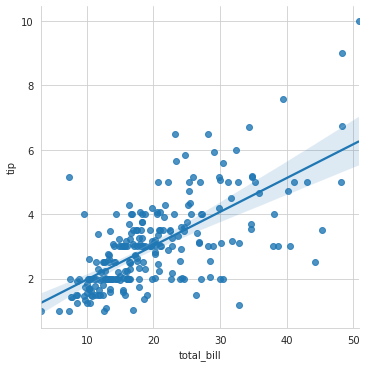

In [99]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)

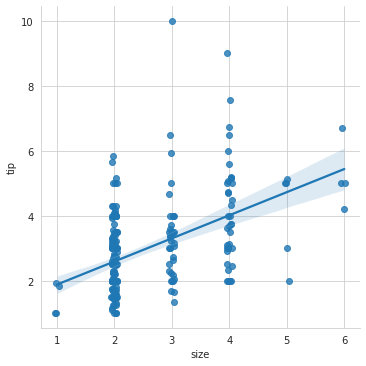

In [101]:
sns.lmplot(x = 'size', y = 'tip', data = tips, x_jitter = 0.05)

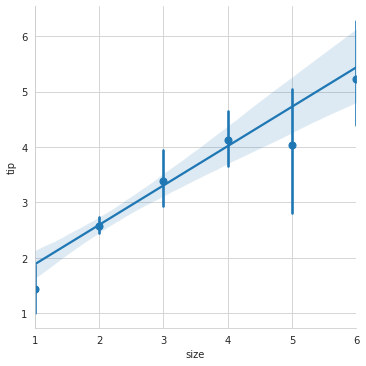

In [102]:
sns.lmplot(x = 'size', y = 'tip', data = tips, x_estimator = np.mean)

**Anscomb Dataset**

In [103]:
data = sns.load_dataset('anscombe')
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [105]:
data['dataset'].value_counts()

IV     11
III    11
II     11
I      11
Name: dataset, dtype: int64

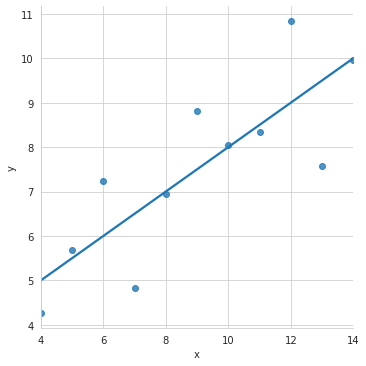

In [107]:
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'I'"), ci = None)

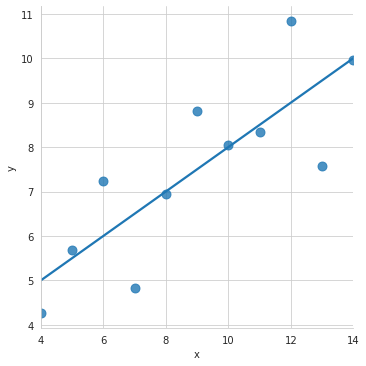

In [108]:
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'I'"), ci = None, scatter_kws = {'s':80})

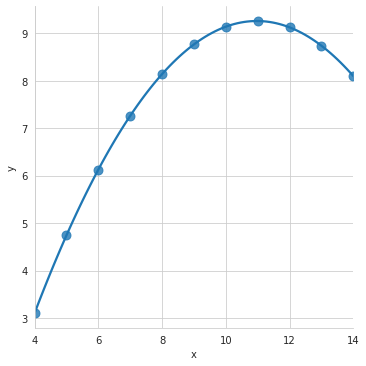

In [113]:
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'II'"), ci = None, scatter_kws = {'s':80}, order = 2)

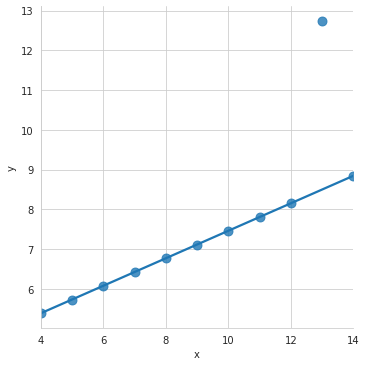

In [117]:
# Set robust = True to remove outlier
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'III'"), ci = None, scatter_kws = {'s':80}, robust = True)

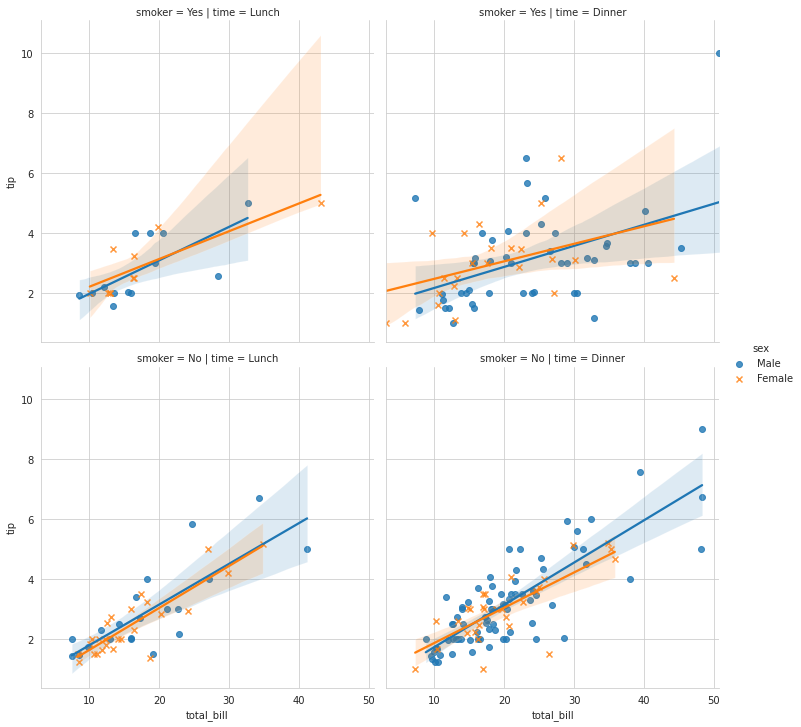

In [121]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'sex', data = tips, markers = ['o', 'x'], col = 'time', row = 'smoker')

# Controlling Plotting figure aesthetics

In [123]:
def sinplot(flip = 1):
  x = np.linspace(0, 14, 100)
  for i in range(1, 7):
    plt.plot(x, np.sin(x+i*0.5)*(7-i)*flip)

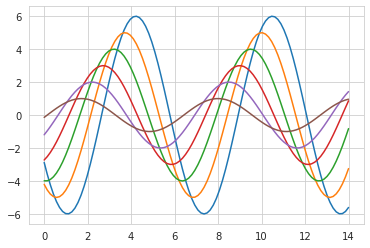

In [124]:
sinplot(-1)

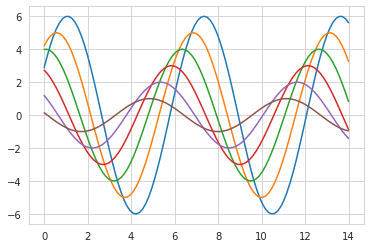

In [125]:
sinplot()

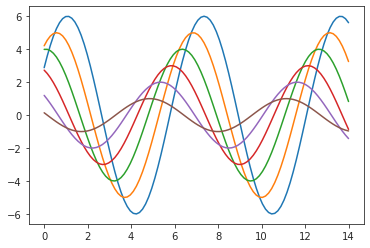

In [126]:
sns.set_style('ticks')
sinplot()

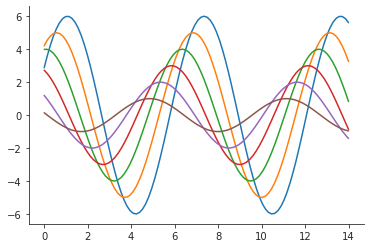

In [129]:
sinplot()
sns.despine()

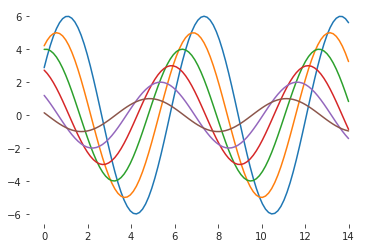

In [130]:
sinplot()
sns.despine(left = True, bottom = True)

In [131]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '.15',
 'xtick.bottom': True,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False}

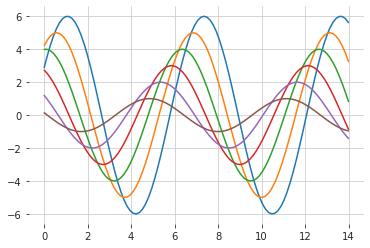

In [132]:
sns.set_style('ticks', {'axes.grid': True})
sinplot()
sns.despine(left = True, bottom = True)

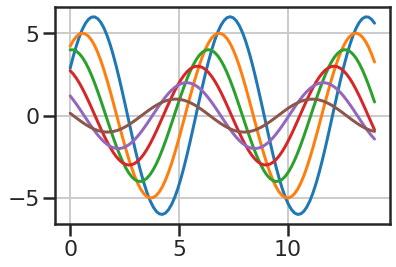

In [133]:
sns.set_context('poster')
sinplot()

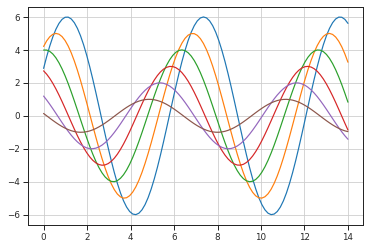

In [134]:
sns.set_context('paper')
sinplot()

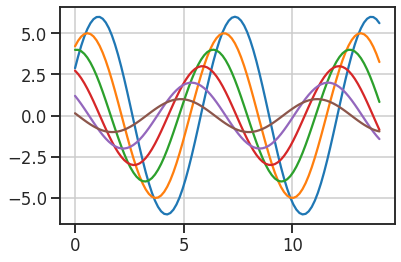

In [135]:
sns.set_context('talk')
sinplot()

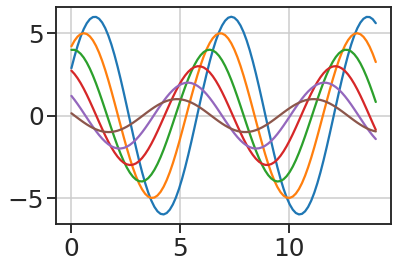

In [136]:
sns.set_context('talk', font_scale = 1.5)
sinplot()

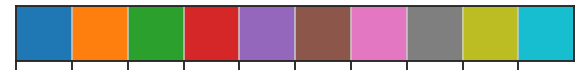

In [137]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

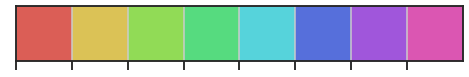

In [138]:
sns.palplot(sns.color_palette('hls', 8))